In [1]:
import pickle
import os
import time

import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import pacf, acf
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split


%matplotlib inline

In [2]:
vx1_opt = pickle.load(open(os.getcwd() + r'\Data\Intraday\Pickle\vx1_opt.pkl', "rb"))

In [3]:
vx1_opt[:"2015-01-21"]

,Strike1,Strike2,Option1,Option2,t1,t2,FWD_PRICE,OPT,VX1-OPT_Spread
2015-01-02 09:40:00,2070.0,2070.0,0.132620,0.136980,11.993056,32.993056,17.175,13.940883,3.234117
2015-01-02 09:50:00,2070.0,2070.0,0.132455,0.136215,11.986111,32.986111,17.275,13.831527,3.443473
2015-01-02 10:00:00,2070.0,2065.0,0.134345,0.138615,11.979167,32.979167,17.375,14.099285,3.275715
2015-01-02 10:10:00,2065.0,2060.0,0.139675,0.143980,11.972222,32.972222,17.725,14.637765,3.087235
2015-01-02 10:20:00,2065.0,2060.0,0.140710,0.144930,11.965278,32.965278,17.725,14.728039,2.996961
2015-01-02 10:30:00,2065.0,2065.0,0.141665,0.143260,11.958333,32.958333,17.725,14.416038,3.308962
2015-01-02 10:40:00,2055.0,2055.0,0.152860,0.150710,11.951389,32.951389,18.500,14.947260,3.552740
2015-01-02 10:50:00,2055.0,2055.0,0.156325,0.153460,11.944444,32.944444,18.475,15.180631,3.294369
2015-01-02 11:00:00,2055.0,2055.0,0.151820,0.151885,11.937500,32.937500,18.425,15.192194,3.232806
2015-01-02 11:10:00,2055.0,2050.0,0.154200,0.155250,11.930556,32.930556,18.625,15.584338,3.040662


In [4]:
mydata = vx1_opt['FWD_PRICE'].to_frame()

### Take log returns of VIX futures for each timestamp $ln(\frac{V_{t}}{V_{t-1}})$ & bucket them by day of the week   

In [5]:
mydata['Ratio'] = np.log(mydata['FWD_PRICE'] / mydata['FWD_PRICE'].shift(1))

In [6]:
mydata['Dayofweek'] = mydata.index.dayofweek

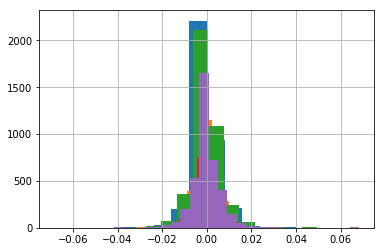

In [7]:
for i in range(5):
    mydata.groupby('Dayofweek').get_group(i)['Ratio'].hist(bins=50)
    plt.xlim([-0.075, 0.075])

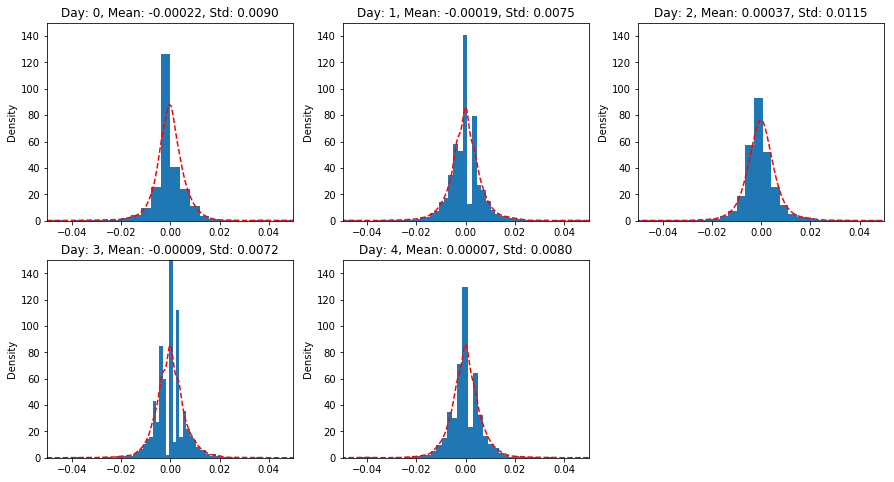

In [8]:
byday = mydata.groupby('Dayofweek')
plt.figure(figsize=(15,8))
for i in range(5):
    plt.subplot(2,3,i+1)
    daydata = byday.get_group(i)['Ratio']
    daydata.hist(bins=100, normed=True)
    daydata.plot(kind='kde', style='r--')
    plt.title('Day: {0}, Mean: {1:.5f}, Std: {2:.4f}'.format(i, daydata.mean(), daydata.std()))
    plt.xlim([-0.05, 0.05])
    plt.ylim([0, 150])
    
    #hist, bin_edges = np.histogram(daydata, density=True)

In [16]:
mydata.head()

,FWD_PRICE,Ratio,Dayofweek
2015-01-02 09:40:00,17.175,NaN,4
2015-01-02 09:50:00,17.275,0.005806,4
2015-01-02 10:00:00,17.375,0.005772,4
2015-01-02 10:10:00,17.725,0.019944,4
2015-01-02 10:20:00,17.725,0.000000,4


In [17]:
mydata['Hour'] = mydata.index.time

In [18]:
mydata.head()

,FWD_PRICE,Ratio,Dayofweek,Hour
2015-01-02 09:40:00,17.175,NaN,4,09:40:00
2015-01-02 09:50:00,17.275,0.005806,4,09:50:00
2015-01-02 10:00:00,17.375,0.005772,4,10:00:00
2015-01-02 10:10:00,17.725,0.019944,4,10:10:00
2015-01-02 10:20:00,17.725,0.000000,4,10:20:00


#### Calculate std dev of VX1's log returns for each individual timestamp

In [24]:
byhour = mydata.groupby('Hour')
hours = mydata['Hour'].unique()
#plt.figure(figsize=(10,6))

hrs_list = hours.tolist()

hrs_std = []
for i in range(39):
    hourdata = byhour.get_group(hours[i])['Ratio']
    hrs_std.append(hourdata.std())

#### Plot std dev of VX1's log returns for each individual timestamp

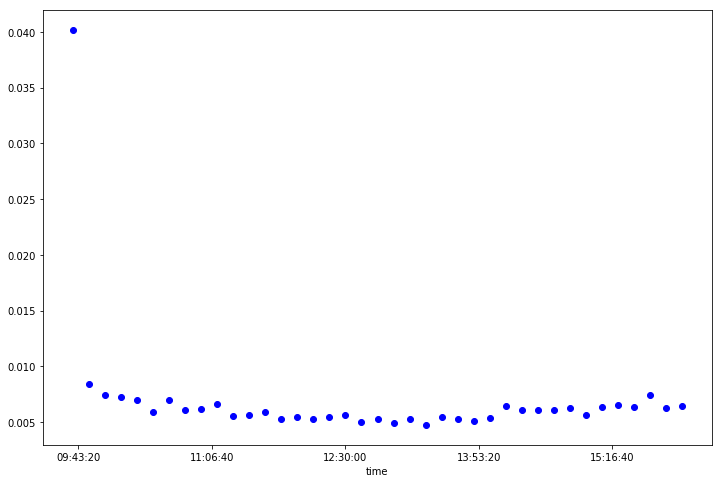

In [25]:
plt.figure(figsize=(12,8))
plt.plot(hours,hrs_std,'bo')

#### Plot std dev of VX1's log returns for each individual timestamp (1st daily t-stamp, 9:40am, **EXCLUDED**)

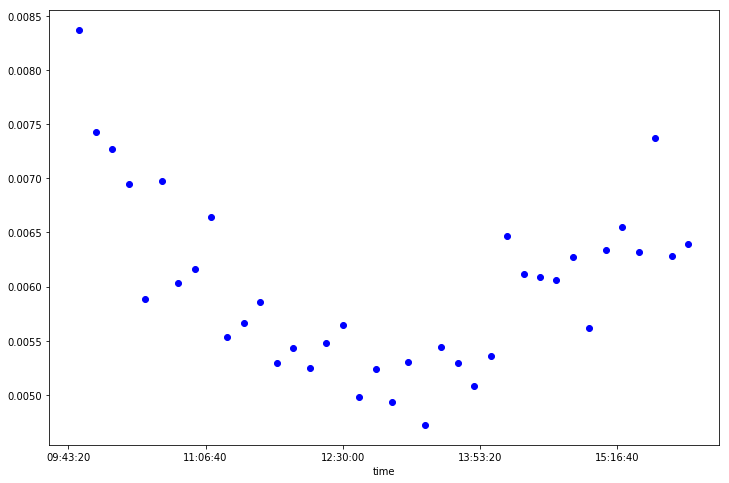

In [23]:
plt.figure(figsize=(12,8))
plt.plot(hours[1:], hrs_std[1:], 'bo')

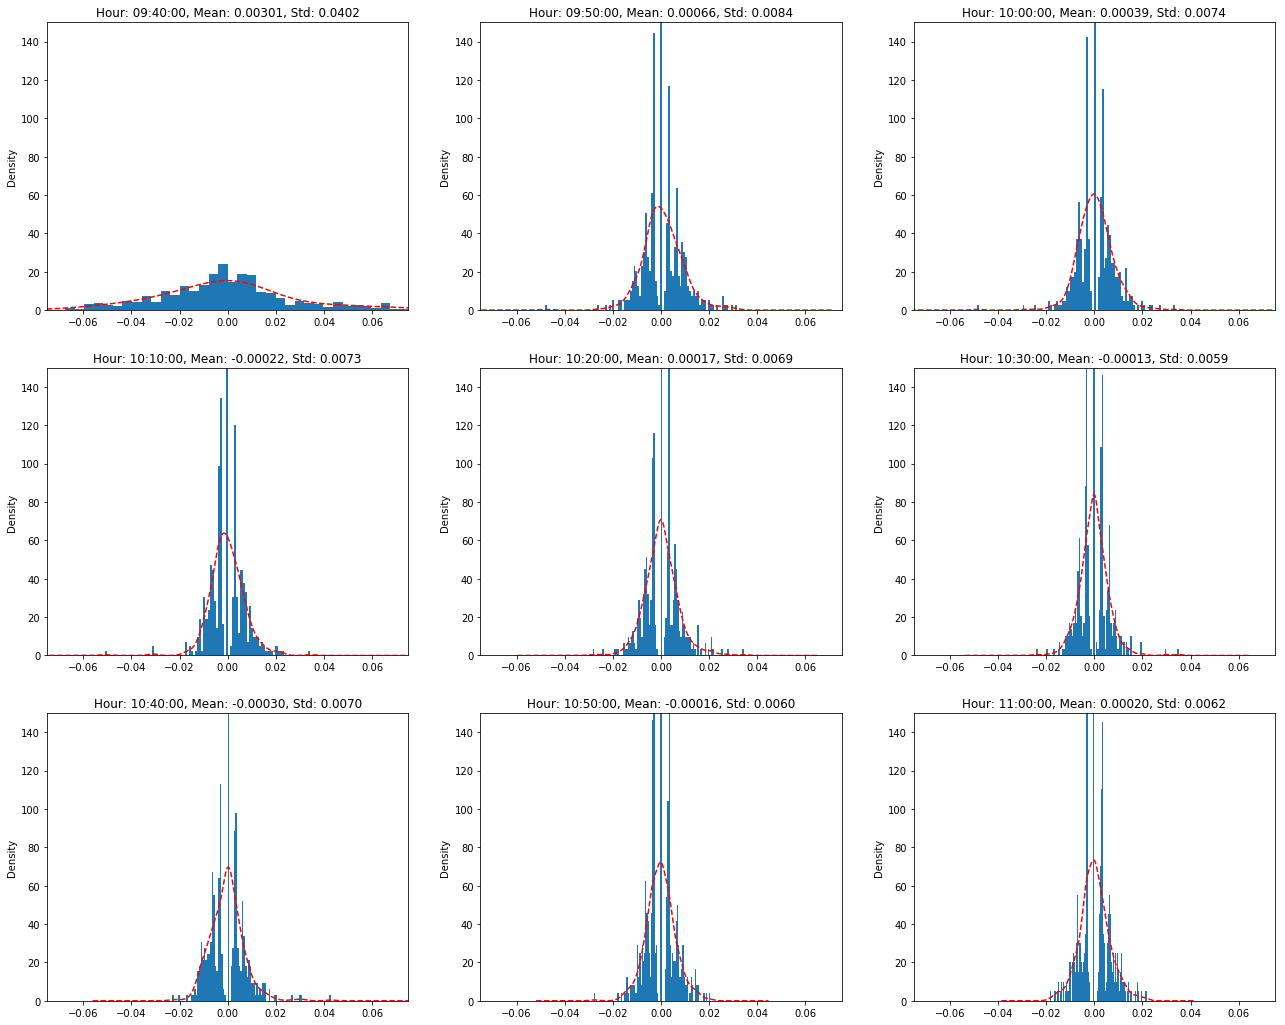

In [22]:
byhour = mydata.groupby('Hour')
hours= mydata['Hour'].unique()
plt.figure(figsize=(22,18))

for i in range(9):
    plt.subplot(3,3,i+1)
    hourdata = byhour.get_group(hours[i])['Ratio']
    hourdata.hist(bins=100, normed=True)
    hourdata.plot(kind='kde', style='r--')
    plt.title('Hour: {0}, Mean: {1:.5f}, Std: {2:.4f}'.format(str(hours[i]), hourdata.mean(), hourdata.std()))
    plt.xlim([-0.075, 0.075])
    plt.ylim([0, 150])

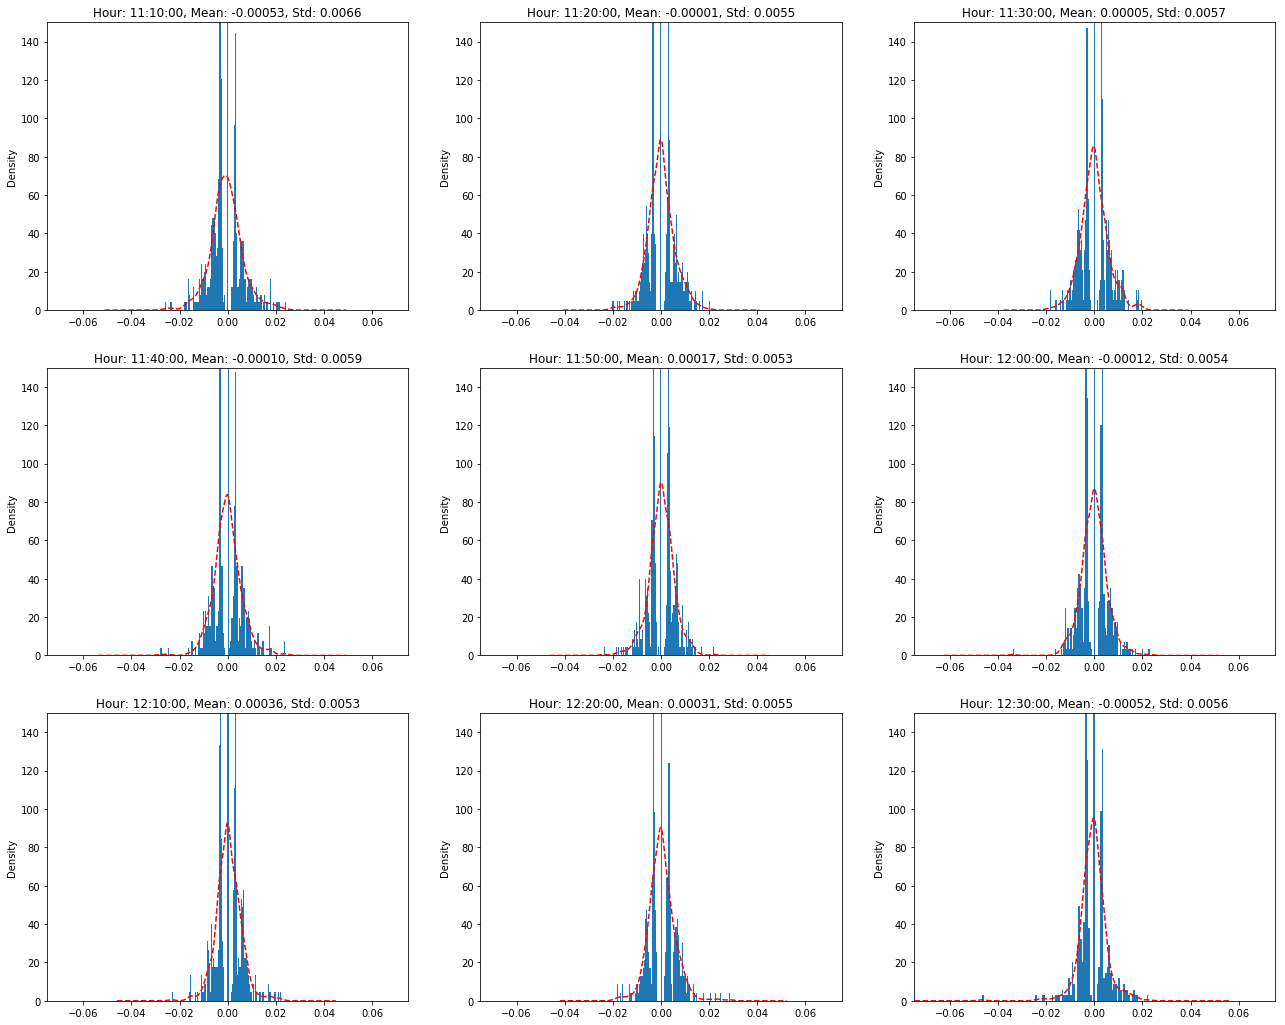

In [23]:
plt.figure(figsize=(22,18))

for i in range(9,18):
    plt.subplot(3,3,i-8)
    hourdata = byhour.get_group(hours[i])['Ratio']
    hourdata.hist(bins=100, normed=True)
    hourdata.plot(kind='kde', style='r--')
    plt.title('Hour: {0}, Mean: {1:.5f}, Std: {2:.4f}'.format(str(hours[i]), hourdata.mean(), hourdata.std()))
    plt.xlim([-0.075, 0.075])
    plt.ylim([0, 150])

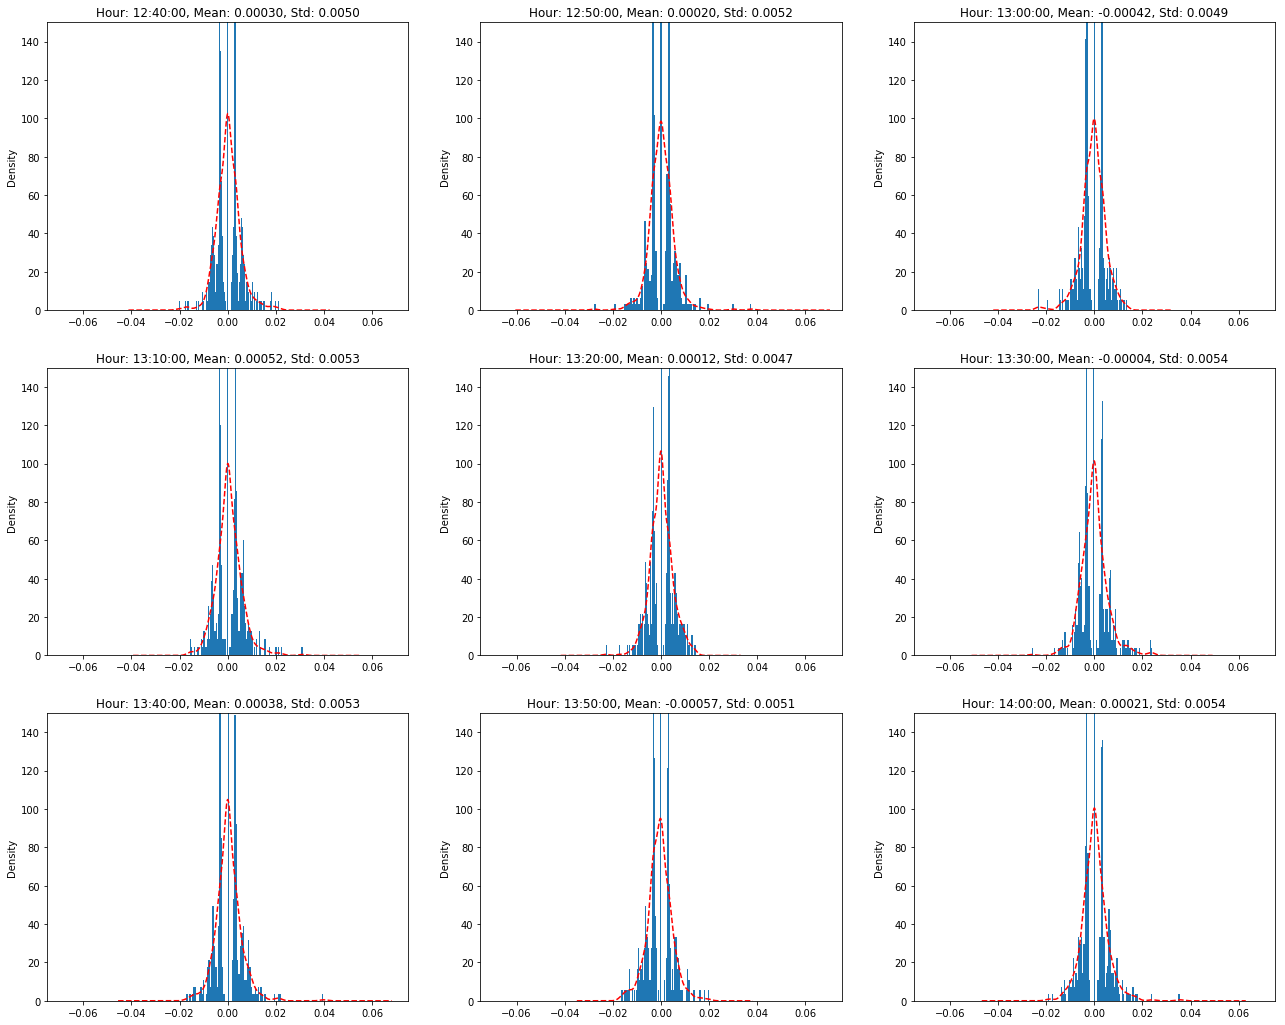

In [24]:
plt.figure(figsize=(22,18))

for i in range(18,27):
    plt.subplot(3,3,i-17)
    hourdata = byhour.get_group(hours[i])['Ratio']
    hourdata.hist(bins=100, normed=True)
    hourdata.plot(kind='kde', style='r--')
    plt.title('Hour: {0}, Mean: {1:.5f}, Std: {2:.4f}'.format(str(hours[i]), hourdata.mean(), hourdata.std()))
    plt.xlim([-0.075, 0.075])
    plt.ylim([0, 150])

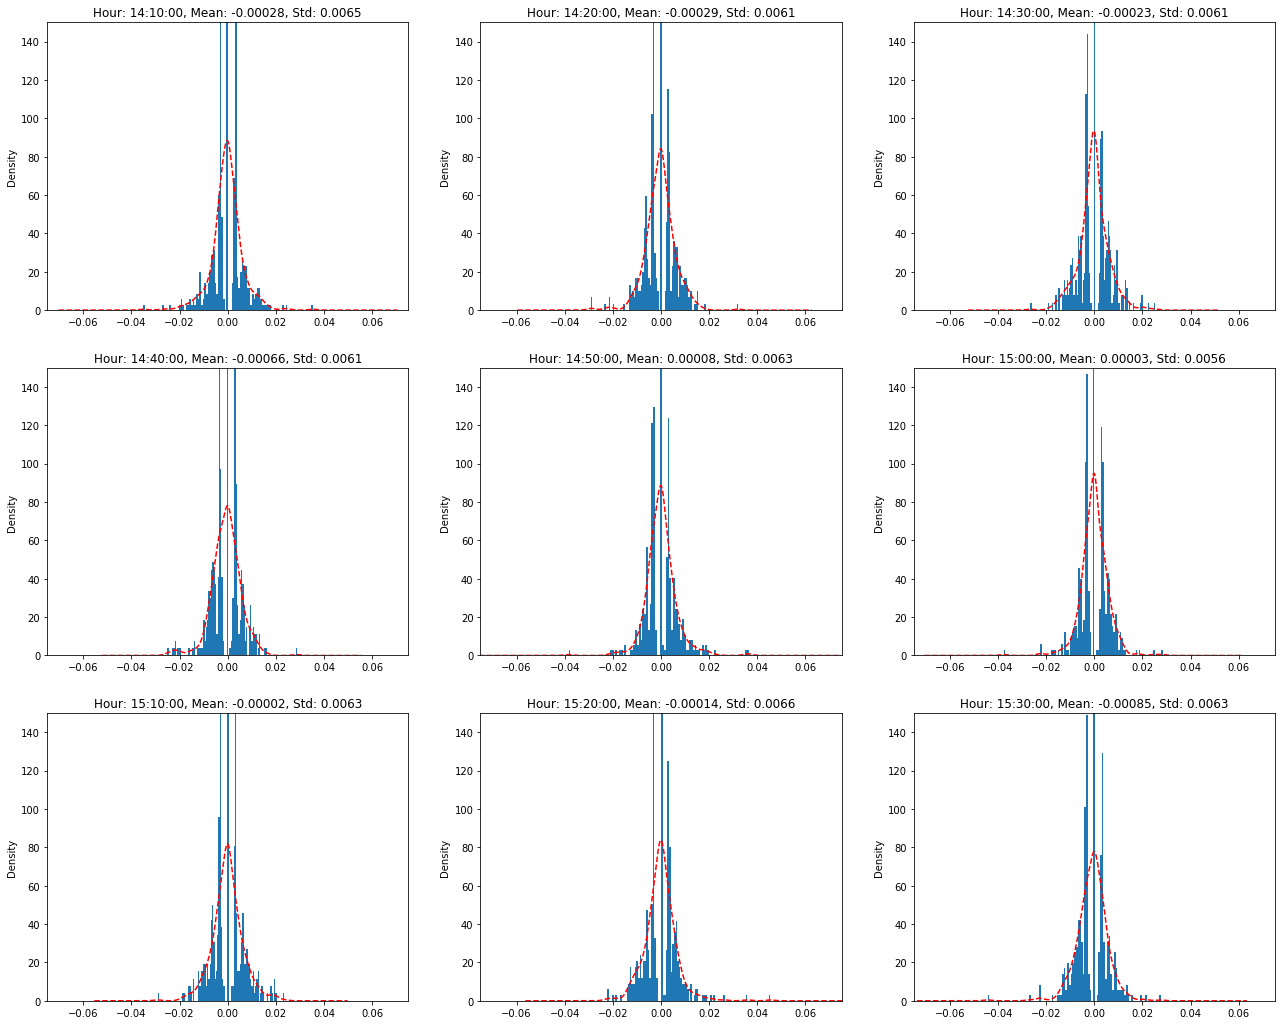

In [25]:
plt.figure(figsize=(22,18))

for i in range(27,36):
    plt.subplot(3,3,i-26)
    hourdata = byhour.get_group(hours[i])['Ratio']
    hourdata.hist(bins=100, normed=True)
    hourdata.plot(kind='kde', style='r--')
    plt.title('Hour: {0}, Mean: {1:.5f}, Std: {2:.4f}'.format(str(hours[i]), hourdata.mean(), hourdata.std()))
    plt.xlim([-0.075, 0.075])
    plt.ylim([0, 150])

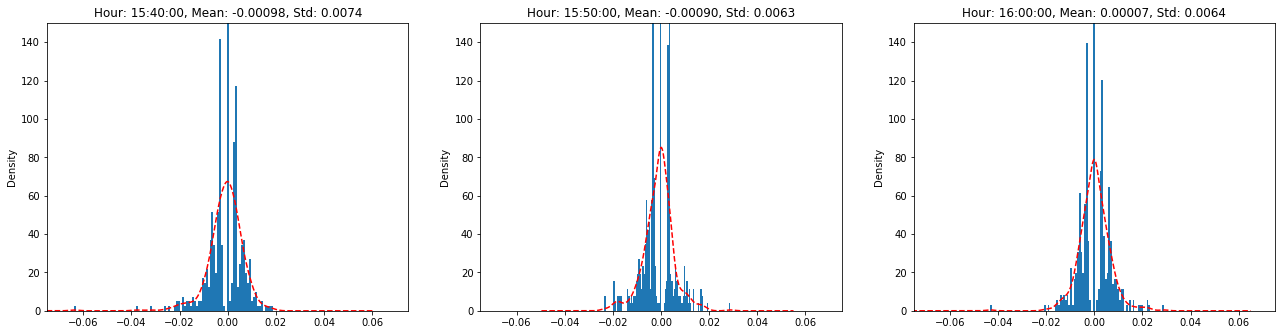

In [28]:
plt.figure(figsize=(22,18))

for i in range(36,39):
    plt.subplot(3,3,i-35)
    hourdata = byhour.get_group(hours[i])['Ratio']
    hourdata.hist(bins=100, normed=True)
    hourdata.plot(kind='kde', style='r--')
    plt.title('Hour: {0}, Mean: {1:.5f}, Std: {2:.4f}'.format(str(hours[i]), hourdata.mean(), hourdata.std()))
    plt.xlim([-0.075, 0.075])
    plt.ylim([0, 150])

In [72]:
mydata[:"2015-01-06"]

,Mid,Ratio,Dayofweek,Hour
2015-01-02 09:40:00,17.175,NaN,4,09:40:00
2015-01-02 09:50:00,17.275,0.005806,4,09:50:00
2015-01-02 10:00:00,17.375,0.005772,4,10:00:00
2015-01-02 10:10:00,17.725,0.019944,4,10:10:00
2015-01-02 10:20:00,17.725,0.000000,4,10:20:00
2015-01-02 10:30:00,17.725,0.000000,4,10:30:00
2015-01-02 10:40:00,18.475,0.041442,4,10:40:00
2015-01-02 10:50:00,18.475,0.000000,4,10:50:00
2015-01-02 11:00:00,18.425,-0.002710,4,11:00:00
2015-01-02 11:10:00,18.625,0.010796,4,11:10:00


<Container object of 50 artists>

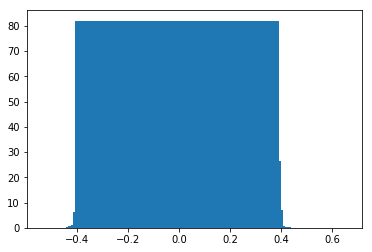

In [22]:
plt.bar(bin_edges[:-1], hist)

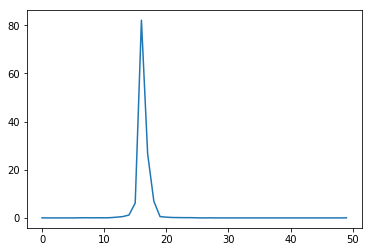

In [23]:
plt.plot(hist)